In [14]:
from keras.utils import normalize
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf


def load_and_resize_images(directory, target_size=(150, 150)):
    X = []
    y = []
    spill_dir = directory+"/Spill"
    no_spill_dir = directory+"/NoSpill"
    for filename in os.listdir(no_spill_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(no_spill_dir, filename)
            img = Image.open(image_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            X.append(img_array)
            y.append(0)  
    for filename in os.listdir(spill_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(spill_dir, filename)
            img = Image.open(image_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            X.append(img_array)
            y.append(1)  
    return np.array(X), np.array(y)

directory='./dataset/train'
X_train,y_train=load_and_resize_images(directory)
directory='./dataset/test'
X_test,y_test=load_and_resize_images(directory)

In [15]:
print(X_test.shape)

(600, 150, 150, 3)


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
8/8 [==============================] - 46s 5s/step - loss: 432.6834 - accuracy: 0.4950 - val_loss: 2.8649 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 34s 4s/step - loss: 2.3273 - accuracy: 0.5079 - val_loss: 0.6069 - val_accuracy: 0.7100
Epoch 3/10
8/8 [==============================] - 31s 4s/step - loss: 0.5303 - accuracy: 0.7471 - val_loss: 0.3347 - val_accuracy: 0.8800
Epoch 4/10
8/8 [==============================] - 30s 4s/step - loss: 0.3104 - accuracy: 0.8854 - val_loss: 0.3189 - val_accuracy: 0.8767
Epoch 5/10
8/8 [==============================] - 30s 4s/step - loss: 0.1920 - accuracy: 0.9307 - val_loss: 0.1639 - val_accuracy: 0.9400
Epoch 6/10
8/8 [==============================] - 29s 4s/step - loss: 0.0995 - accuracy: 0.9621 - val_loss: 0.0726 - val_accuracy: 0.9633
Epoch 7/10
8/8 [==============================] - 30s 4s/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch 8/10
8/8 [================

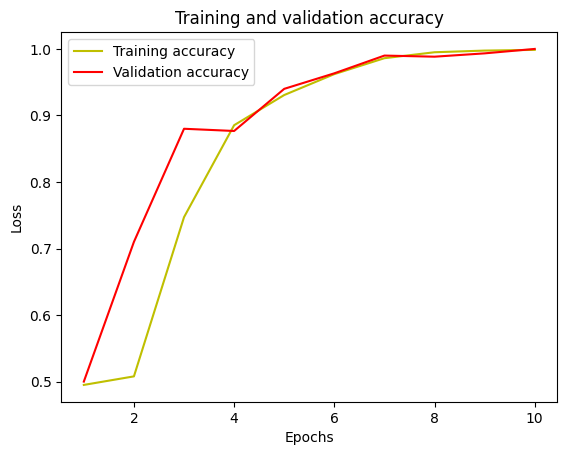

In [17]:
history = model.fit(X_train,y_train,steps_per_epoch = 8,epochs = 10,verbose=1,validation_data=(X_test,y_test))
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.save("spill_detect_model.keras")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0